In [9]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

pd.set_option('display.max_columns', None) # None = mostra todas as colunas


In [10]:

df = pd.read_csv('acidentes2018.csv', sep=';', encoding='latin-1')

# Dados crus
print(df.columns)
df.head()

# =========================================================
# A princípio pensamos que cada linha do csv tivesse informações relativas a um
# acidente, mas após olhar com mais cuidado percebemos que existem várias linhas
# com o mesmo id. Também temos colunas como "idade", "sexo" e "estado_fisico",
# que não fazem sentido quando estamos falando de um acidente.

# Acontece que cada linha representa __uma pessoa envolvida__ em um acidente.
# Então se um acidente envolveu, digamos, 5 pessoas, haverão 5 linhas referentes
# a este acidente no csv. Podemos ver que há uma certa redundância nos dados,
# pois algumas das informações como o horário e o local do acidente são as
# mesmas para todos os envolvidos.

# As features incluem, entre outras informações:
# 
# * __Causa do acidente__: "Defeito Mecânico no Veículo", "Falta de Atenção à Condução", etc
# * __Tipo do acidente__: "Capotamento", "Colisão traseira", etc
# * __Local onde aconteceu__: município, BR e até mesmo a latitude e longitude de onde aconteceu.
# * __Condição meteorológica__: como estava o clima no momento do acidente.
# * __Estado físico dos envolvidos__: "ilesos", "feridos leves", "feridos graves" ou "mortos".
# * __Tipo do veículo__: automóvel, motocicleta, etc
# =========================================================

# =========================================================
# ## Limpeza inicial dos dados
# =========================================================


Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'id_veiculo', 'tipo_veiculo', 'marca', 'ano_fabricacao_veiculo',
       'tipo_envolvido', 'estado_fisico', 'idade', 'sexo', 'ilesos',
       'feridos_leves', 'feridos_graves', 'mortos', 'latitude', 'longitude',
       'regional', 'delegacia', 'uop'],
      dtype='object')


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,99973.0,216524.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,177708,Automóvel,GM/OPALA COMODORO SL,1988.0,Passageiro,Lesões Graves,59.0,Feminino,0,0,1,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ
1,99973.0,216530.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,177708,Automóvel,GM/OPALA COMODORO SL,1988.0,Passageiro,Lesões Graves,15.0,Masculino,0,0,1,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ
2,99973.0,216523.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,177708,Automóvel,GM/OPALA COMODORO SL,1988.0,Condutor,Lesões Graves,58.0,Masculino,0,0,1,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ
3,99973.0,216527.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,177708,Automóvel,GM/OPALA COMODORO SL,1988.0,Passageiro,Lesões Graves,9.0,Feminino,0,0,1,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ
4,99973.0,216532.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,177708,Automóvel,GM/OPALA COMODORO SL,1988.0,Passageiro,Ileso,9.0,Masculino,1,0,0,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ


In [11]:

df.dropna(inplace=True)

# =========================================================
# ## Análises com dados dos acidentes
# =========================================================


In [12]:

# Agrupa os dados por acidente
grouped_by_accident = df.groupby('id')

# Se o acidente é o mesmo, essas informações vão ser iguais pra todas as linhas daquele acidente
accident_data = grouped_by_accident[
    'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio',
    'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia',
    'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via',
    'uso_solo', 'latitude', 'longitude', 'regional'
].first()

# Calcula a quantidade de feridos, mortos, etc em cada acidente
accident_data['n_ilesos'] = grouped_by_accident['ilesos'].sum()
accident_data['n_feridos_leves'] = grouped_by_accident['feridos_leves'].sum()
accident_data['n_feridos_graves'] = grouped_by_accident['feridos_graves'].sum()
accident_data['n_mortos'] = grouped_by_accident['mortos'].sum()
accident_data['n_envolvidos'] = (
    accident_data['n_ilesos'] +
    accident_data['n_feridos_leves'] +
    accident_data['n_feridos_graves'] +
    accident_data['n_mortos']
)

accident_data.head()


,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,latitude,longitude,regional,n_ilesos,n_feridos_leves,n_feridos_graves,n_mortos,n_envolvidos
id,,,,,,,,,,,,,,,,,,,,,,,,
99973.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,-22.469370,-44.447050,SR-RJ,1,0,4,0,5
99976.0,2018-01-01,segunda-feira,00:40:00,SC,282.0,"0,4",FLORIANOPOLIS,Não guardar distância de segurança,Colisão traseira,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,-27.599717,-48.575657,SR-SC,1,0,2,0,3
99977.0,2018-01-01,segunda-feira,00:30:00,RJ,493.0,1,ITABORAI,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Curva,Não,-22.763901,-42.927532,SR-RJ,3,1,0,0,4
99981.0,2018-01-01,segunda-feira,01:15:00,RS,386.0,134,SARANDI,Ingestão de Álcool,Colisão transversal,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Simples,Interseção de vias,Não,-27.953636,-52.916374,SR-RS,2,0,0,0,2
99982.0,2018-01-01,segunda-feira,00:20:00,RS,293.0,"151,7",CANDIOTA,Falta de Atenção à Condução,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Não,-31.395214,-53.783912,SR-RS,0,0,1,0,1


In [13]:

# Algumas estatísticas
accident_data.describe()


,br,latitude,longitude,n_ilesos,n_feridos_leves,n_feridos_graves,n_mortos,n_envolvidos
count,64192.000000,64192.000000,64192.000000,64192.000000,64192.000000,64192.000000,64192.000000,64192.000000
mean,215.128240,-19.041791,-46.557128,1.055801,0.843142,0.239376,0.067641,2.205960
std,131.405654,7.679369,6.010316,1.315044,1.111682,0.595766,0.312641,1.779506
min,10.000000,-33.689819,-66.741943,0.000000,0.000000,0.000000,0.000000,1.000000
25%,101.000000,-25.400818,-50.150905,0.000000,0.000000,0.000000,0.000000,1.000000
50%,163.000000,-20.511170,-47.762203,1.000000,1.000000,0.000000,0.000000,2.000000
75%,343.000000,-13.593445,-42.672018,1.000000,1.000000,0.000000,0.000000,3.000000
max,498.000000,-0.703107,-34.827690,56.000000,58.000000,28.000000,13.000000,80.000000


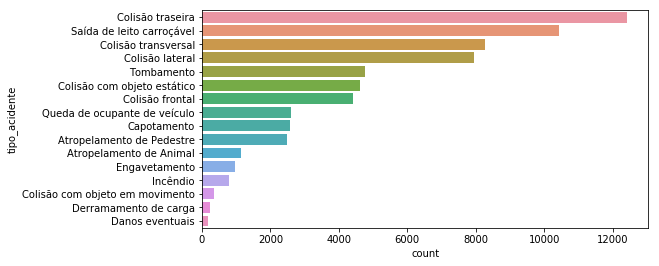

In [14]:

# Número de acidentes por tipo
plt.figure(figsize=(8,4))
sns.countplot(
    y="tipo_acidente",
    data=accident_data,
    order=accident_data['tipo_acidente'].value_counts().index
)


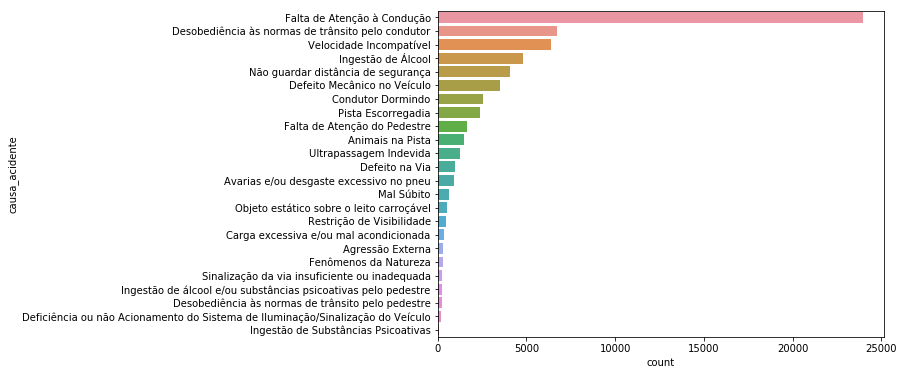

In [15]:

# Número de acidentes por causa
plt.figure(figsize=(8,6))
sns.countplot(
    y="causa_acidente",
    data=accident_data,
    order=accident_data['causa_acidente'].value_counts().index
)


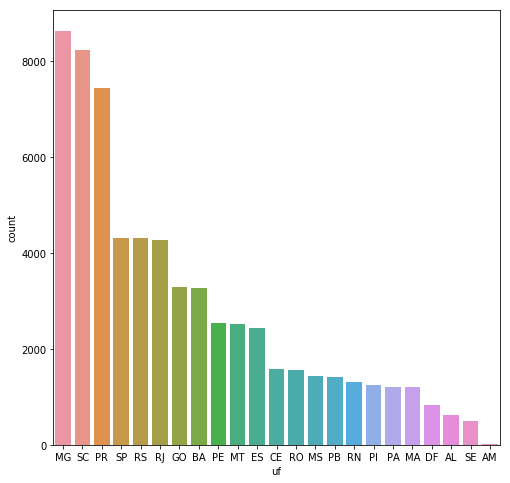

In [36]:

# Número de acidentes por estado
plt.figure(figsize=(8,8))
sns.countplot(
    x="uf",
    data=accident_data,
    order=accident_data['uf'].value_counts().index
)

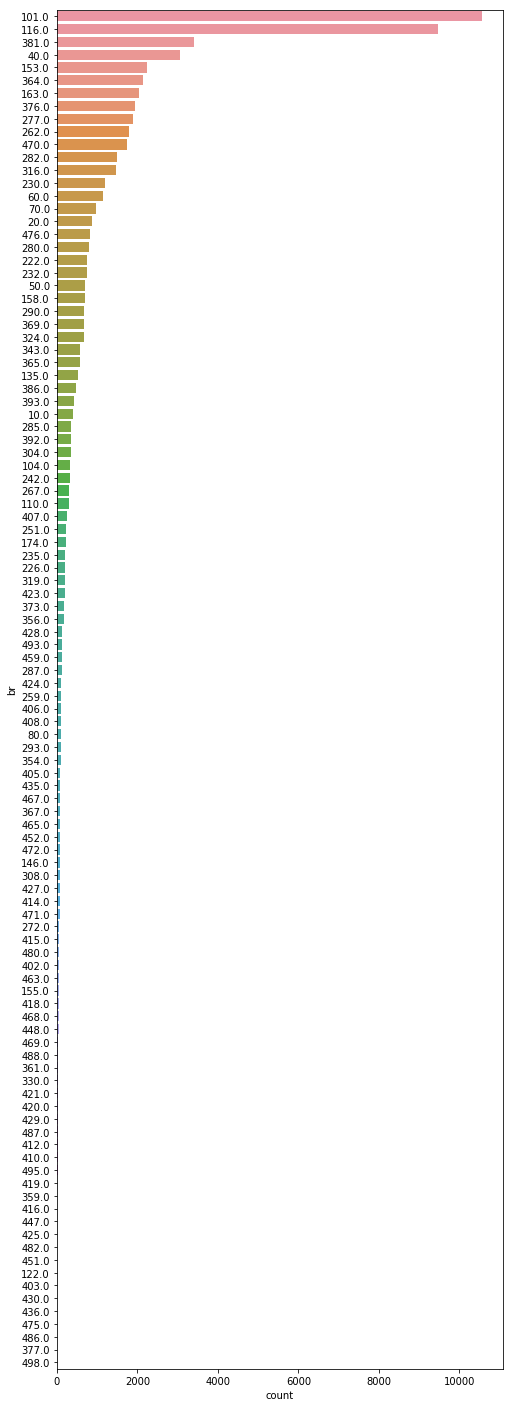

In [17]:

# Número de acidentes por BR
plt.figure(figsize=(8,25))
sns.countplot(
    y="br",
    data=accident_data,
    order=accident_data['br'].value_counts().index
)


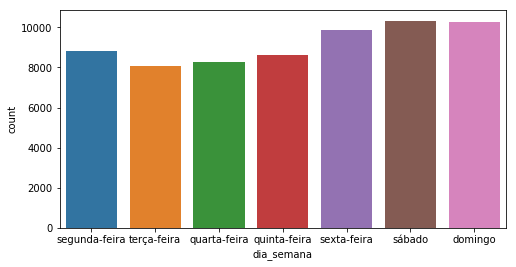

In [18]:

# Número de acidentes por dia da semana
plt.figure(figsize=(8,4))
sns.countplot(x="dia_semana", data=accident_data)


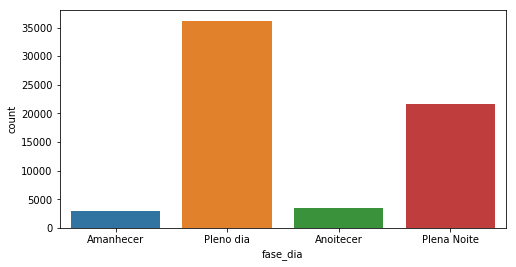

In [19]:

# Número de acidentes por fase do dia
plt.figure(figsize=(8,4))
sns.countplot(
    x="fase_dia",
    data=accident_data,
    order=['Amanhecer', 'Pleno dia', 'Anoitecer', 'Plena Noite']
)


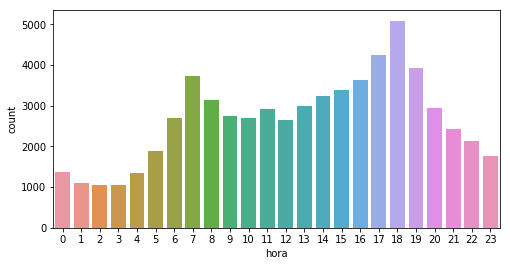

In [20]:

# Distribuição dos acidentes durante o dia
accident_data['hora'] = pd.to_datetime(accident_data['horario']).dt.hour

plt.figure(figsize=(8, 4))
sns.countplot(x='hora', data=accident_data)


/home/gabriel/anaconda3/envs/ciencia_dados/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


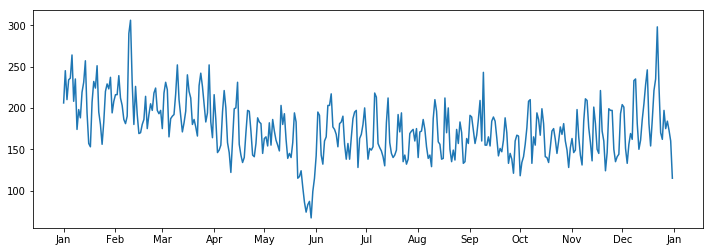

In [21]:

# Distribuição dos acidentes durante o ano (série temporal)

# Já é pra estar ordenado por data no dataset, mas só pra garantir
accident_data['data_inversa'] = pd.to_datetime(accident_data['data_inversa'])
accident_data.sort_values(by='data_inversa')

plt.figure(figsize=(12, 4))
plot = sns.lineplot(data=accident_data.groupby('data_inversa').size())
# Coloca uma marcação pra cada mes, abreviado (ex: 'Jan')
plot.xaxis.set_major_locator(mdates.MonthLocator()) 
plot.xaxis.set_major_formatter(mdates.DateFormatter('%b')) 


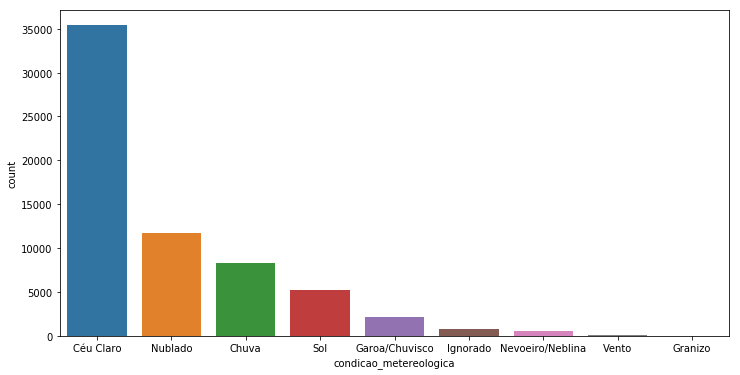

In [22]:

# Número de acidentes por clima
plt.figure(figsize=(12,6))
sns.countplot(
    x="condicao_metereologica",
    data=accident_data,
    order=accident_data['condicao_metereologica'].value_counts().index
)


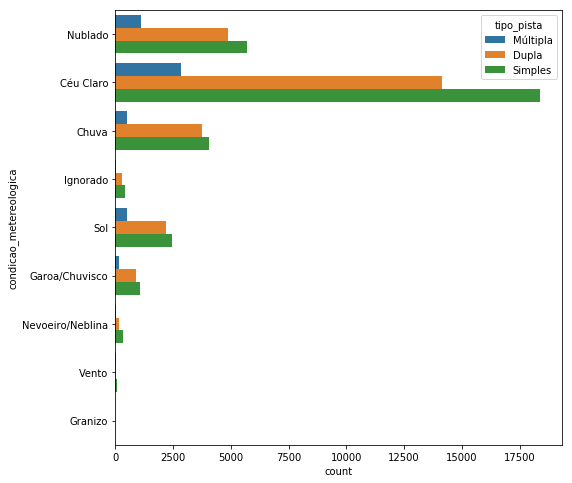

In [23]:

# Número de acidentes por tipo de pista, pra cada clima
plt.figure(figsize=(8,8))
sns.countplot(y='condicao_metereologica', hue='tipo_pista', data=accident_data)


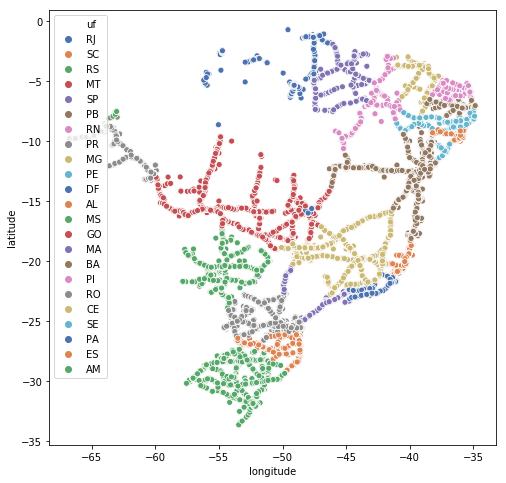

In [24]:

# Latitude e longitude
plt.figure(figsize=(8,8))
plot = sns.scatterplot(
    x="longitude",
    y="latitude",
    palette='deep',
    hue='uf',
    data=accident_data
)

# =========================================================
# Análises com dados dos veículos
# =========================================================


In [25]:

# Agrupa os dados por veículo
grouped_by_vehicle = df.groupby('id_veiculo')

vehicle_data = grouped_by_vehicle[
    'tipo_veiculo', 'ano_fabricacao_veiculo', 'causa_acidente'
].first()

# Calcula a quantidade de feridos, mortos, etc em cada veículo
vehicle_data['n_ilesos'] = grouped_by_vehicle['ilesos'].sum()
vehicle_data['n_feridos_leves'] = grouped_by_vehicle['feridos_leves'].sum()
vehicle_data['n_feridos_graves'] = grouped_by_vehicle['feridos_graves'].sum()
vehicle_data['n_mortos'] = grouped_by_vehicle['mortos'].sum()
vehicle_data['n_envolvidos'] = (
    vehicle_data['n_ilesos'] +
    vehicle_data['n_feridos_leves'] +
    vehicle_data['n_feridos_graves'] +
    vehicle_data['n_mortos']
)

vehicle_data.head()


,tipo_veiculo,ano_fabricacao_veiculo,causa_acidente,n_ilesos,n_feridos_leves,n_feridos_graves,n_mortos,n_envolvidos
id_veiculo,,,,,,,,
177629,Motocicleta,2017.0,Não guardar distância de segurança,0,0,2,0,2
177630,Automóvel,2010.0,Não guardar distância de segurança,1,0,0,0,1
177642,Camioneta,2015.0,Animais na Pista,1,0,0,0,1
177645,Caminhonete,2007.0,Ingestão de Álcool,1,0,0,0,1
177646,Automóvel,2012.0,Ingestão de Álcool,1,0,0,0,1


In [26]:

# Algumas estatísticas
vehicle_data.describe()


,ano_fabricacao_veiculo,n_ilesos,n_feridos_leves,n_feridos_graves,n_mortos,n_envolvidos
count,101215.000000,101215.000000,101215.000000,101215.000000,101215.000000,101215.000000
mean,2008.819473,0.669604,0.534733,0.151815,0.042899,1.399052
std,7.460076,0.896232,0.903989,0.460819,0.242331,1.176998
min,1900.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2006.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2014.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2018.000000,55.000000,47.000000,27.000000,11.000000,55.000000


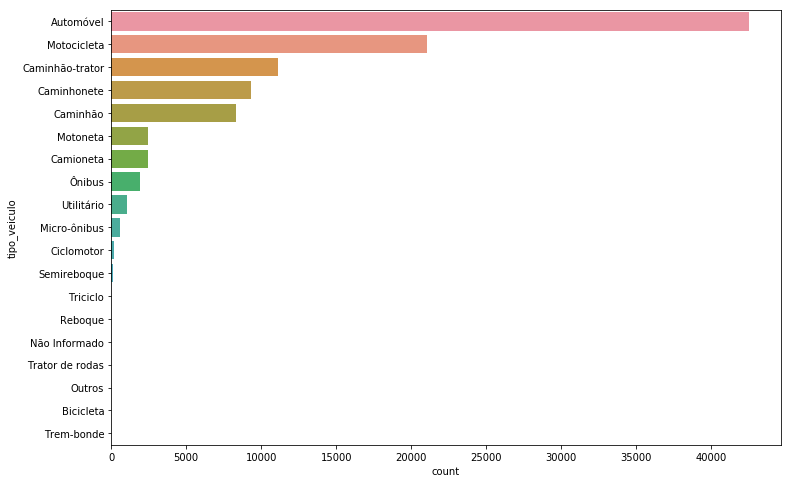

In [27]:

# Acidentes por tipo de veiculo
plt.figure(figsize=(12,8))
sns.countplot(
    y="tipo_veiculo",
    data=vehicle_data,
    order=vehicle_data['tipo_veiculo'].value_counts().index
)

# Já era de se esperar que automóveis são os que mais estão envolvidos


[(1960, 2020)]

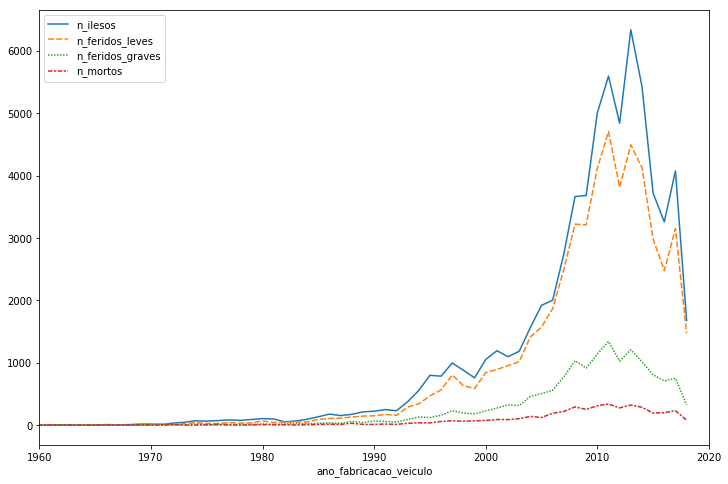

In [28]:

# Uma questão que seria interessante explorar é se os carros mais novos são mais seguros, mas não temos dados suficientes para responder isso.

# Número de mortos x ilesos x feridos graves x feridos leves por ano do veículo
plt.figure(figsize=(12,8))
plot = sns.lineplot(data=vehicle_data.groupby('ano_fabricacao_veiculo')['n_ilesos', 'n_feridos_leves', 'n_feridos_graves', 'n_mortos'].agg('sum'))
plot.set(xlim=(1960, 2020))

# =========================================================
# Análises com dados dos condutores
# =========================================================


In [29]:

# Pegando apenas os condutores
drivers_data = df[df['tipo_envolvido'] == 'Condutor'][['id', 'pesid', 'idade', 'sexo']]

drivers_data.head()


,id,pesid,idade,sexo
2,99973.0,216523.0,58.0,Masculino
5,99976.0,216291.0,27.0,Masculino
6,99976.0,216292.0,29.0,Masculino
9,99977.0,218442.0,26.0,Masculino
12,99977.0,218440.0,41.0,Masculino


In [34]:

# Algumas estatísticas
drivers_data[['idade']].describe()


,idade
count,100727.000000
mean,39.809465
std,13.142797
min,11.000000
25%,30.000000
50%,38.000000
75%,49.000000
max,98.000000


In [31]:

# Remove algumas idades erradas (> 100)
drivers_data = drivers_data[(drivers_data['idade'] > 10) & (drivers_data['idade'] < 100)]


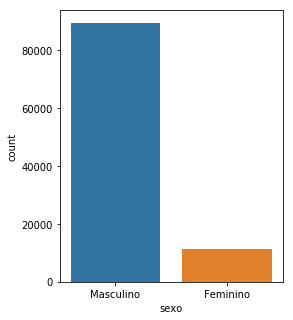

In [32]:

# Número de condutores por genero (ignorando os ignorados lulz)
drivers_data = drivers_data[drivers_data['sexo'] != 'Ignorado']

plt.figure(figsize=(4,5))
sns.countplot(x='sexo', data=drivers_data)


[[<matplotlib.axis.XTick at 0x7f1539467b00>,

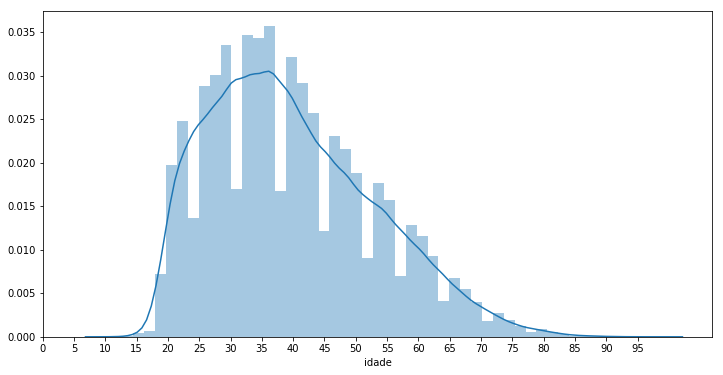

In [33]:

# Distribuição da idade dos dos condutores
plt.figure(figsize=(12,6))
plot = sns.distplot(drivers_data['idade'])
plot.set(xticks=range(0, 100, 5))
